<a href="https://colab.research.google.com/github/camilavincensi/TCC-previsao-commodities/blob/main/Modelo_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte 1: Treinando e Testando o Modelo ARIMA apenas com precos_diarios_soja_milho_parana_ajustado.csv

<ipython-input-7-efb569267019>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_soy['Forecast'] = forecast_soy


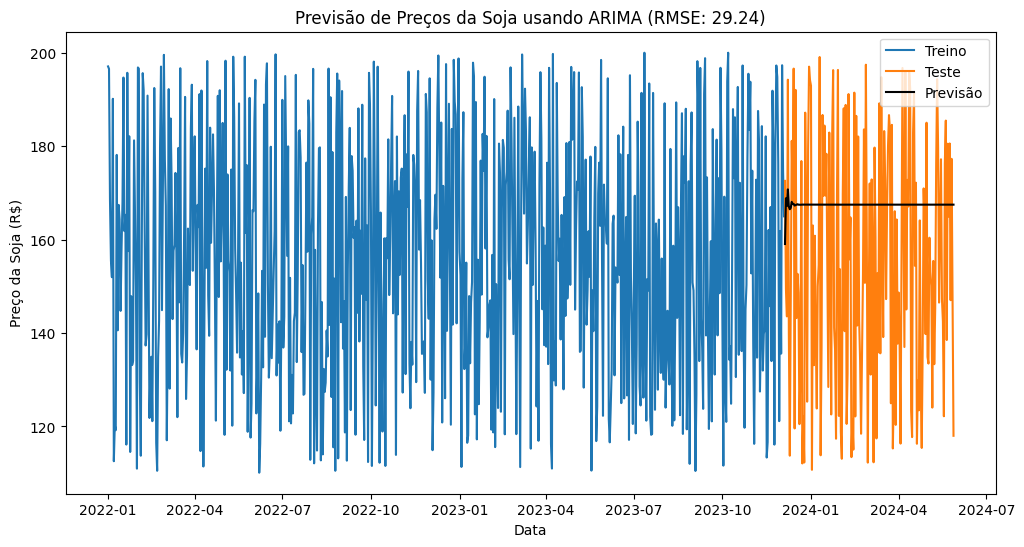

<ipython-input-7-efb569267019>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_corn['Forecast'] = forecast_corn


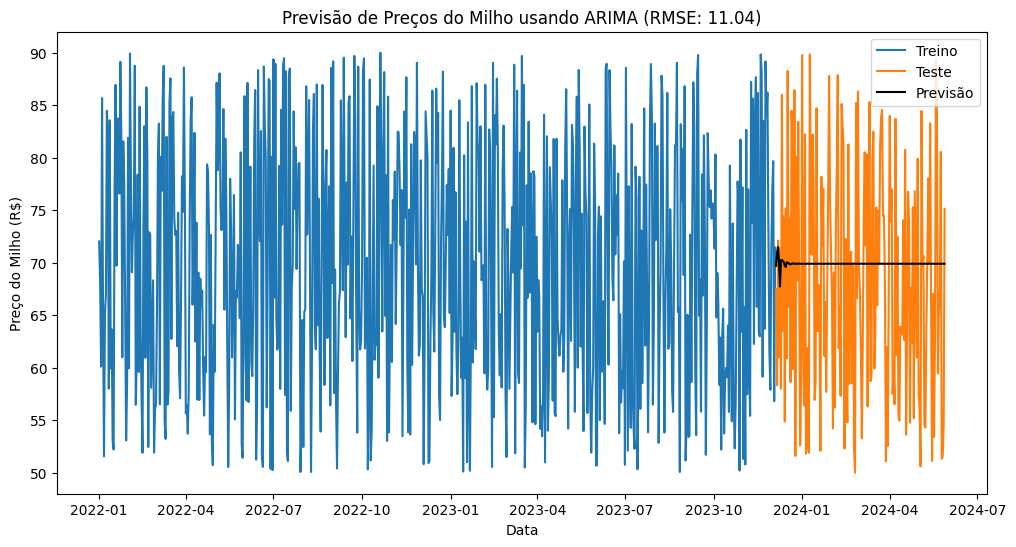

RMSE para o modelo ARIMA de soja: 29.24
RMSE para o modelo ARIMA de milho: 11.04


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Carregar o arquivo precos_diarios_soja_milho_parana_ajustado.csv
commodities_prices_path = 'precos_diarios_soja_milho_parana_ajustado.csv'
commodities_prices = pd.read_csv(commodities_prices_path, encoding='latin1', delimiter=',')

# Renomear as colunas
commodities_prices.columns = ['Date', 'Price Soy (R$)', 'Price Corn (R$)']

# Converter a coluna de data para o formato datetime
commodities_prices['Date'] = pd.to_datetime(commodities_prices['Date'], format='%Y-%m-%d')

# Selecionar a série temporal para soja
soy_prices = commodities_prices[['Date', 'Price Soy (R$)']].drop_duplicates()
soy_prices.set_index('Date', inplace=True)
soy_prices = soy_prices.asfreq('D').fillna(method='ffill')

# Selecionar a série temporal para milho
corn_prices = commodities_prices[['Date', 'Price Corn (R$)']].drop_duplicates()
corn_prices.set_index('Date', inplace=True)
corn_prices = corn_prices.asfreq('D').fillna(method='ffill')

# Dividir os dados em conjuntos de treino e teste para soja
train_size_soy = int(len(soy_prices) * 0.8)
train_soy, test_soy = soy_prices[:train_size_soy], soy_prices[train_size_soy:]

# Dividir os dados em conjuntos de treino e teste para milho
train_size_corn = int(len(corn_prices) * 0.8)
train_corn, test_corn = corn_prices[:train_size_corn], corn_prices[train_size_corn:]

# Treinar o modelo ARIMA para soja
model_soy = ARIMA(train_soy, order=(5, 1, 0))
model_fit_soy = model_soy.fit()

# Fazer previsões com o modelo ajustado para soja
forecast_soy = model_fit_soy.forecast(steps=len(test_soy))
test_soy['Forecast'] = forecast_soy

# Avaliar o desempenho do modelo para soja
mse_soy = mean_squared_error(test_soy['Price Soy (R$)'], test_soy['Forecast'])
rmse_soy = np.sqrt(mse_soy)

# Plotar os resultados do modelo para soja
plt.figure(figsize=(12, 6))
plt.plot(train_soy.index, train_soy, label='Treino')
plt.plot(test_soy.index, test_soy['Price Soy (R$)'], label='Teste')
plt.plot(test_soy.index, test_soy['Forecast'], label='Previsão', color='black')
plt.xlabel('Data')
plt.ylabel('Preço da Soja (R$)')
plt.title(f'Previsão de Preços da Soja usando ARIMA (RMSE: {rmse_soy:.2f})')
plt.legend()
plt.show()

# Treinar o modelo ARIMA para milho
model_corn = ARIMA(train_corn, order=(5, 1, 0))
model_fit_corn = model_corn.fit()

# Fazer previsões com o modelo ajustado para milho
forecast_corn = model_fit_corn.forecast(steps=len(test_corn))
test_corn['Forecast'] = forecast_corn

# Avaliar o desempenho do modelo para milho
mse_corn = mean_squared_error(test_corn['Price Corn (R$)'], test_corn['Forecast'])
rmse_corn = np.sqrt(mse_corn)

# Plotar os resultados do modelo para milho
plt.figure(figsize=(12, 6))
plt.plot(train_corn.index, train_corn, label='Treino')
plt.plot(test_corn.index, test_corn['Price Corn (R$)'], label='Teste')
plt.plot(test_corn.index, test_corn['Forecast'], label='Previsão', color='black')
plt.xlabel('Data')
plt.ylabel('Preço do Milho (R$)')
plt.title(f'Previsão de Preços do Milho usando ARIMA (RMSE: {rmse_corn:.2f})')
plt.legend()
plt.show()

# Exibir os RMSEs
print(f'RMSE para o modelo ARIMA de soja: {rmse_soy:.2f}')
print(f'RMSE para o modelo ARIMA de milho: {rmse_corn:.2f}')


Parte 2: Treinando e Testando o Modelo ARIMA com precos_diarios_soja_milho_parana_ajustado.csv e combined_climate_data.csv

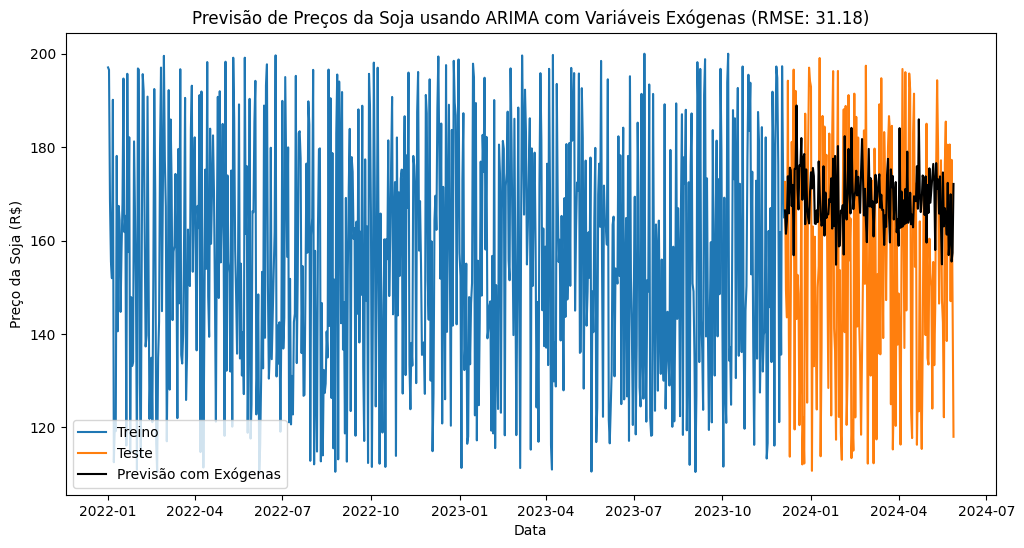

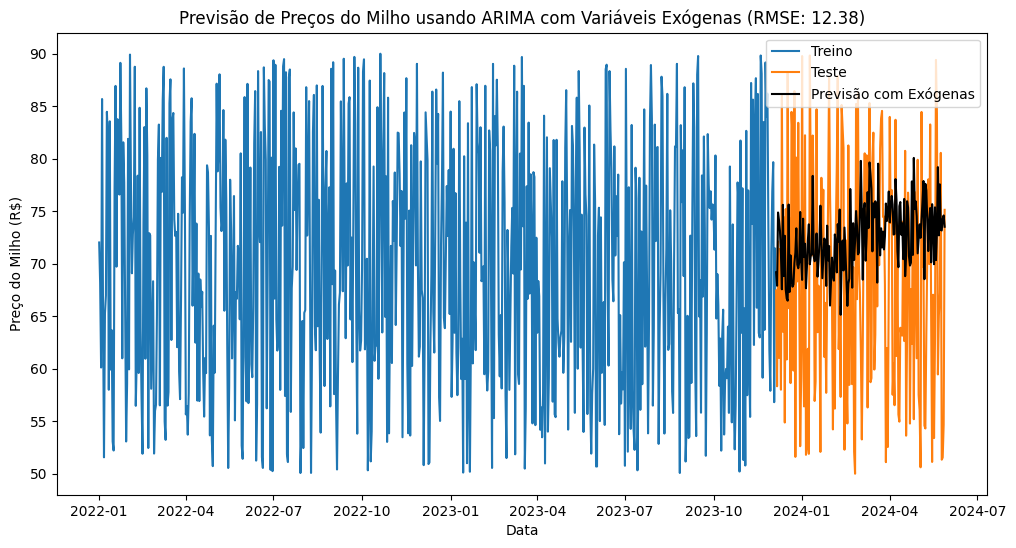

RMSE para o modelo ARIMA de soja com exógenas: 31.18
RMSE para o modelo ARIMA de milho com exógenas: 12.38


In [ ]:
# Carregar os dados dos arquivos enviados pelo usuário
climate_data_path = 'combined_climate_data.csv'
climate_data = pd.read_csv(climate_data_path, encoding='latin1', delimiter=',')

# Renomear as colunas
climate_data.columns = ['Date', 'Country', 'City', 'Temperature (C)', 'Humidity (%)', 'Precipitation (mm)']

# Converter a coluna de data para o formato datetime
climate_data['Date'] = pd.to_datetime(climate_data['Date'], format='%Y-%m-%d')

# Pivotar o dataframe de climate_data para que cada cidade seja uma coluna
climate_data_pivot = climate_data.pivot(index='Date', columns='City', values=['Temperature (C)', 'Humidity (%)', 'Precipitation (mm)'])

# Flatten the multi-level columns
climate_data_pivot.columns = ['_'.join(col).strip() for col in climate_data_pivot.columns.values]

# Unir os dataframes com base na coluna de data
merged_data_climate = pd.merge(commodities_prices, climate_data_pivot, on='Date', how='left')

# Remover duplicatas na coluna de data
merged_data_climate = merged_data_climate.drop_duplicates(subset=['Date'])

# Selecionar a série temporal para soja
soy_prices = merged_data_climate[['Date', 'Price Soy (R$)']].drop_duplicates()
soy_prices.set_index('Date', inplace=True)
soy_prices = soy_prices.asfreq('D').fillna(method='ffill')

# Selecionar a série temporal para milho
corn_prices = merged_data_climate[['Date', 'Price Corn (R$)']].drop_duplicates()
corn_prices.set_index('Date', inplace=True)
corn_prices = corn_prices.asfreq('D').fillna(method='ffill')

# Selecionar as variáveis exógenas
exog_variables_climate = merged_data_climate[['Date'] + [col for col in merged_data_climate.columns if 'Temperature' in col or 'Humidity' in col or 'Precipitation' in col]].drop_duplicates()
exog_variables_climate.set_index('Date', inplace=True)
exog_variables_climate = exog_variables_climate.asfreq('D').fillna(method='ffill')

# Dividir os dados em conjuntos de treino e teste para soja
train_size_soy = int(len(soy_prices) * 0.8)
train_soy, test_soy = soy_prices[:train_size_soy], soy_prices[train_size_soy:]
exog_train_soy, exog_test_soy = exog_variables_climate[:train_size_soy], exog_variables_climate[train_size_soy:]

# Dividir os dados em conjuntos de treino e teste para milho
train_size_corn = int(len(corn_prices) * 0.8)
train_corn, test_corn = corn_prices[:train_size_corn], corn_prices[train_size_corn:]
exog_train_corn, exog_test_corn = exog_variables_climate[:train_size_corn], exog_variables_climate[train_size_corn:]

# Garantir que os índices estejam alinhados para soja
train_soy, exog_train_soy = train_soy.align(exog_train_soy, join='inner', axis=0)
test_soy, exog_test_soy = test_soy.align(exog_test_soy, join='inner', axis=0)

# Garantir que os índices estejam alinhados para milho
train_corn, exog_train_corn = train_corn.align(exog_train_corn, join='inner', axis=0)
test_corn, exog_test_corn = test_corn.align(exog_test_corn, join='inner', axis=0)

# Treinar o modelo ARIMA com variáveis exógenas para soja
model_exog_soy = ARIMA(train_soy, order=(5, 1, 0), exog=exog_train_soy)
model_exog_fit_soy = model_exog_soy.fit()

# Fazer previsões com o modelo ajustado para soja
forecast_exog_soy = model_exog_fit_soy.forecast(steps=len(test_soy), exog=exog_test_soy)
test_soy['Forecast_Exog'] = forecast_exog_soy

# Avaliar o desempenho do modelo refinado para soja
mse_exog_soy = mean_squared_error(test_soy['Price Soy (R$)'], test_soy['Forecast_Exog'])
rmse_exog_soy = np.sqrt(mse_exog_soy)

# Plotar os resultados do modelo refinado para soja
plt.figure(figsize=(12, 6))
plt.plot(train_soy.index, train_soy, label='Treino')
plt.plot(test_soy.index, test_soy['Price Soy (R$)'], label='Teste')
plt.plot(test_soy.index, test_soy['Forecast_Exog'], label='Previsão com Exógenas', color='black')
plt.xlabel('Data')
plt.ylabel('Preço da Soja (R$)')
plt.title(f'Previsão de Preços da Soja usando ARIMA com Variáveis Exógenas (RMSE: {rmse_exog_soy:.2f})')
plt.legend()
plt.show()

# Treinar o modelo ARIMA com variáveis exógenas para milho
model_exog_corn = ARIMA(train_corn, order=(5, 1, 0), exog=exog_train_corn)
model_exog_fit_corn = model_exog_corn.fit()

# Fazer previsões com o modelo ajustado para milho
forecast_exog_corn = model_exog_fit_corn.forecast(steps=len(test_corn), exog=exog_test_corn)
test_corn['Forecast_Exog'] = forecast_exog_corn

# Avaliar o desempenho do modelo refinado para milho
mse_exog_corn = mean_squared_error(test_corn['Price Corn (R$)'], test_corn['Forecast_Exog'])
rmse_exog_corn = np.sqrt(mse_exog_corn)

# Plotar os resultados do modelo refinado para milho
plt.figure(figsize=(12, 6))
plt.plot(train_corn.index, train_corn, label='Treino')
plt.plot(test_corn.index, test_corn['Price Corn (R$)'], label='Teste')
plt.plot(test_corn.index, test_corn['Forecast_Exog'], label='Previsão com Exógenas', color='black')
plt.xlabel('Data')
plt.ylabel('Preço do Milho (R$)')
plt.title(f'Previsão de Preços do Milho usando ARIMA com Variáveis Exógenas (RMSE: {rmse_exog_corn:.2f})')
plt.legend()
plt.show()

# Exibir os RMSEs
print(f'RMSE para o modelo ARIMA de soja com exógenas: {rmse_exog_soy:.2f}')
print(f'RMSE para o modelo ARIMA de milho com exógenas: {rmse_exog_corn:.2f}')


Parte 3: Treinando e Testando o Modelo ARIMA com precos_diarios_soja_milho_parana_ajustado.csv e historical_data.csv

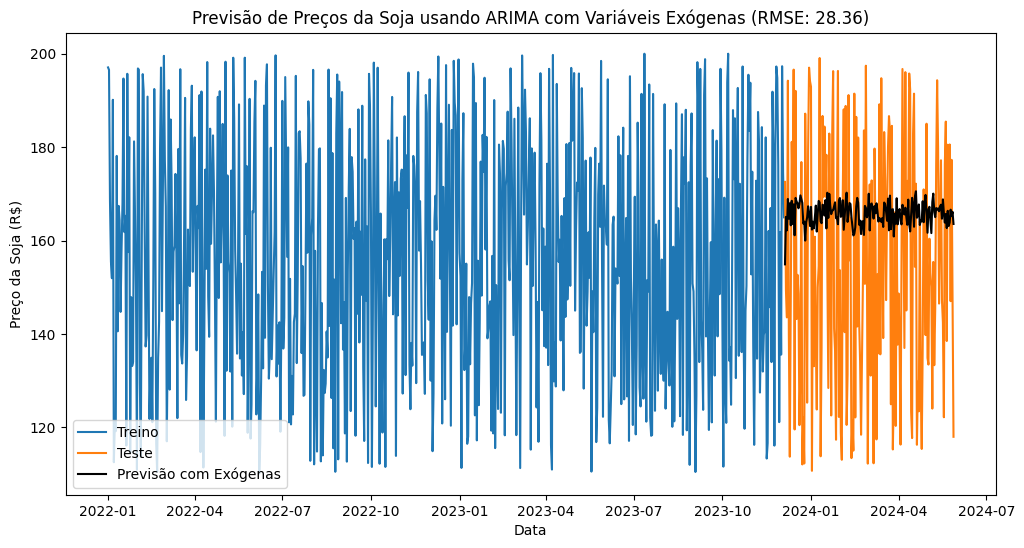

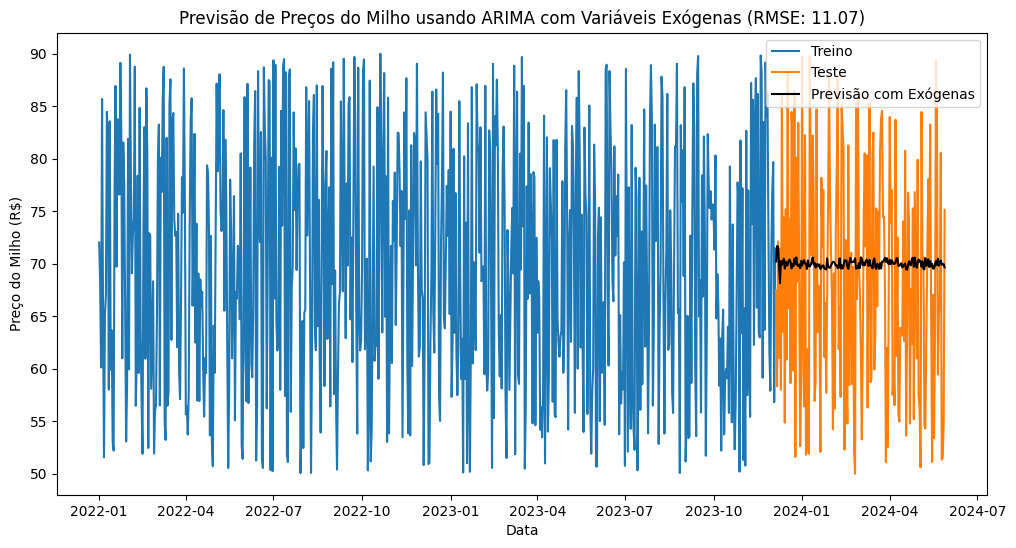

RMSE para o modelo ARIMA de soja com exógenas: 28.36
RMSE para o modelo ARIMA de milho com exógenas: 11.07


In [ ]:
# Carregar o arquivo historical_data.csv
historical_data_path = 'historical_data.csv'
historical_data = pd.read_csv(historical_data_path, encoding='latin1', delimiter=',')

# Renomear as colunas
historical_data.columns = ['Date', 'Crude Oil Price (USD/barrel)', 'USD/BRL', 'IBOVESPA']

# Converter a coluna de data para o formato datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d')

# Unir os dataframes com base na coluna de data
merged_data_historical = pd.merge(commodities_prices, historical_data, on='Date', how='left')

# Remover duplicatas na coluna de data
merged_data_historical = merged_data_historical.drop_duplicates(subset=['Date'])

# Selecionar a série temporal para soja
soy_prices = merged_data_historical[['Date', 'Price Soy (R$)']].drop_duplicates()
soy_prices.set_index('Date', inplace=True)
soy_prices = soy_prices.asfreq('D').fillna(method='ffill')

# Selecionar a série temporal para milho
corn_prices = merged_data_historical[['Date', 'Price Corn (R$)']].drop_duplicates()
corn_prices.set_index('Date', inplace=True)
corn_prices = corn_prices.asfreq('D').fillna(method='ffill')

# Selecionar as variáveis exógenas
exog_variables_historical = merged_data_historical[['Date', 'Crude Oil Price (USD/barrel)', 'USD/BRL', 'IBOVESPA']].drop_duplicates()
exog_variables_historical.set_index('Date', inplace=True)
exog_variables_historical = exog_variables_historical.asfreq('D').fillna(method='ffill')

# Dividir os dados em conjuntos de treino e teste para soja
train_size_soy = int(len(soy_prices) * 0.8)
train_soy, test_soy = soy_prices[:train_size_soy], soy_prices[train_size_soy:]
exog_train_soy, exog_test_soy = exog_variables_historical[:train_size_soy], exog_variables_historical[train_size_soy:]

# Dividir os dados em conjuntos de treino e teste para milho
train_size_corn = int(len(corn_prices) * 0.8)
train_corn, test_corn = corn_prices[:train_size_corn], corn_prices[train_size_corn:]
exog_train_corn, exog_test_corn = exog_variables_historical[:train_size_corn], exog_variables_historical[train_size_corn:]

# Garantir que os índices estejam alinhados para soja
train_soy, exog_train_soy = train_soy.align(exog_train_soy, join='inner', axis=0)
test_soy, exog_test_soy = test_soy.align(exog_test_soy, join='inner', axis=0)

# Garantir que os índices estejam alinhados para milho
train_corn, exog_train_corn = train_corn.align(exog_train_corn, join='inner', axis=0)
test_corn, exog_test_corn = test_corn.align(exog_test_corn, join='inner', axis=0)

# Treinar o modelo ARIMA com variáveis exógenas para soja
model_exog_soy = ARIMA(train_soy, order=(5, 1, 0), exog=exog_train_soy)
model_exog_fit_soy = model_exog_soy.fit()

# Fazer previsões com o modelo ajustado para soja
forecast_exog_soy = model_exog_fit_soy.forecast(steps=len(test_soy), exog=exog_test_soy)
test_soy['Forecast_Exog'] = forecast_exog_soy

# Avaliar o desempenho do modelo refinado para soja
mse_exog_soy = mean_squared_error(test_soy['Price Soy (R$)'], test_soy['Forecast_Exog'])
rmse_exog_soy = np.sqrt(mse_exog_soy)

# Plotar os resultados do modelo refinado para soja
plt.figure(figsize=(12, 6))
plt.plot(train_soy.index, train_soy, label='Treino')
plt.plot(test_soy.index, test_soy['Price Soy (R$)'], label='Teste')
plt.plot(test_soy.index, test_soy['Forecast_Exog'], label='Previsão com Exógenas', color='black')
plt.xlabel('Data')
plt.ylabel('Preço da Soja (R$)')
plt.title(f'Previsão de Preços da Soja usando ARIMA com Variáveis Exógenas (RMSE: {rmse_exog_soy:.2f})')
plt.legend()
plt.show()

# Treinar o modelo ARIMA com variáveis exógenas para milho
model_exog_corn = ARIMA(train_corn, order=(5, 1, 0), exog=exog_train_corn)
model_exog_fit_corn = model_exog_corn.fit()

# Fazer previsões com o modelo ajustado para milho
forecast_exog_corn = model_exog_fit_corn.forecast(steps=len(test_corn), exog=exog_test_corn)
test_corn['Forecast_Exog'] = forecast_exog_corn

# Avaliar o desempenho do modelo refinado para milho
mse_exog_corn = mean_squared_error(test_corn['Price Corn (R$)'], test_corn['Forecast_Exog'])
rmse_exog_corn = np.sqrt(mse_exog_corn)

# Plotar os resultados do modelo refinado para milho
plt.figure(figsize=(12, 6))
plt.plot(train_corn.index, train_corn, label='Treino')
plt.plot(test_corn.index, test_corn['Price Corn (R$)'], label='Teste')
plt.plot(test_corn.index, test_corn['Forecast_Exog'], label='Previsão com Exógenas', color='black')
plt.xlabel('Data')
plt.ylabel('Preço do Milho (R$)')
plt.title(f'Previsão de Preços do Milho usando ARIMA com Variáveis Exógenas (RMSE: {rmse_exog_corn:.2f})')
plt.legend()
plt.show()

# Exibir os RMSEs
print(f'RMSE para o modelo ARIMA de soja com exógenas: {rmse_exog_soy:.2f}')
print(f'RMSE para o modelo ARIMA de milho com exógenas: {rmse_exog_corn:.2f}')


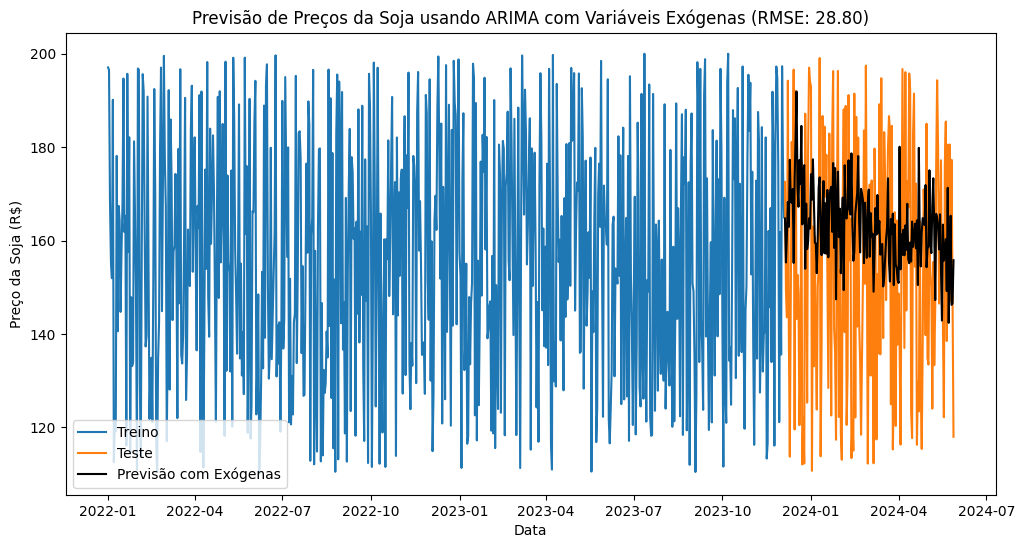

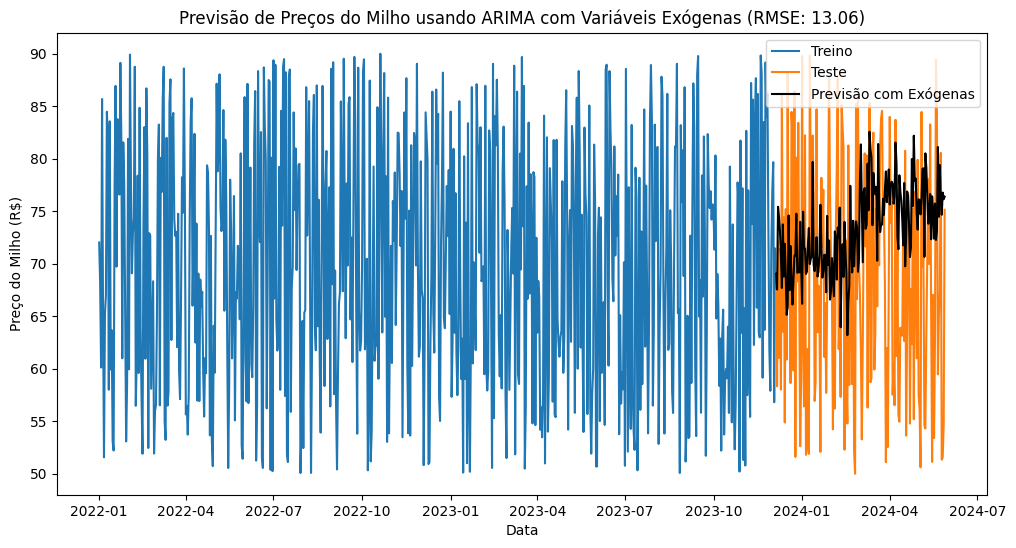

RMSE para o modelo ARIMA de soja com exógenas: 28.80
RMSE para o modelo ARIMA de milho com exógenas: 13.06


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Carregar os dados dos arquivos enviados pelo usuário
climate_data_path = 'combined_climate_data.csv'
historical_data_path = 'historical_data.csv'
commodities_prices_path = 'precos_diarios_soja_milho_parana_ajustado.csv'

climate_data = pd.read_csv(climate_data_path, encoding='latin1', delimiter=',')
historical_data = pd.read_csv(historical_data_path, encoding='latin1', delimiter=',')
commodities_prices = pd.read_csv(commodities_prices_path, encoding='latin1', delimiter=',')

# Renomear as colunas
climate_data.columns = ['Date', 'Country', 'City', 'Temperature (C)', 'Humidity (%)', 'Precipitation (mm)']
historical_data.columns = ['Date', 'Crude Oil Price (USD/barrel)', 'USD/BRL', 'IBOVESPA']
commodities_prices.columns = ['Date', 'Price Soy (R$)', 'Price Corn (R$)']

# Converter as colunas de data para o formato datetime
climate_data['Date'] = pd.to_datetime(climate_data['Date'], format='%Y-%m-%d')
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d')
commodities_prices['Date'] = pd.to_datetime(commodities_prices['Date'], format='%Y-%m-%d')

# Pivotar o dataframe de climate_data para que cada cidade seja uma coluna
climate_data_pivot = climate_data.pivot(index='Date', columns='City', values=['Temperature (C)', 'Humidity (%)', 'Precipitation (mm)'])

# Flatten the multi-level columns
climate_data_pivot.columns = ['_'.join(col).strip() for col in climate_data_pivot.columns.values]

# Unir os dataframes com base na coluna de data
merged_data = pd.merge(commodities_prices, climate_data_pivot, on='Date', how='left')
merged_data = pd.merge(merged_data, historical_data, on='Date', how='left')

# Remover duplicatas na coluna de data
merged_data = merged_data.drop_duplicates(subset=['Date'])


merged_data.head()



# Selecionar a série temporal para soja
soy_prices = merged_data[['Date', 'Price Soy (R$)']].drop_duplicates()
soy_prices.set_index('Date', inplace=True)
soy_prices = soy_prices.asfreq('D').fillna(method='ffill')

# Selecionar a série temporal para milho
corn_prices = merged_data[['Date', 'Price Corn (R$)']].drop_duplicates()
corn_prices.set_index('Date', inplace=True)
corn_prices = corn_prices.asfreq('D').fillna(method='ffill')

# Selecionar as variáveis exógenas
exog_variables = merged_data[['Date'] + [col for col in merged_data.columns if 'Temperature' in col or 'Humidity' in col or 'Precipitation' in col] +
                             ['Crude Oil Price (USD/barrel)', 'USD/BRL', 'IBOVESPA']].drop_duplicates()
exog_variables.set_index('Date', inplace=True)
exog_variables = exog_variables.asfreq('D').fillna(method='ffill')

# Dividir os dados em conjuntos de treino e teste para soja
train_size_soy = int(len(soy_prices) * 0.8)
train_soy, test_soy = soy_prices[:train_size_soy], soy_prices[train_size_soy:]
exog_train_soy, exog_test_soy = exog_variables[:train_size_soy], exog_variables[train_size_soy:]

# Dividir os dados em conjuntos de treino e teste para milho
train_size_corn = int(len(corn_prices) * 0.8)
train_corn, test_corn = corn_prices[:train_size_corn], corn_prices[train_size_corn:]
exog_train_corn, exog_test_corn = exog_variables[:train_size_corn], exog_variables[train_size_corn:]

# Garantir que os índices estejam alinhados para soja
train_soy, exog_train_soy = train_soy.align(exog_train_soy, join='inner', axis=0)
test_soy, exog_test_soy = test_soy.align(exog_test_soy, join='inner', axis=0)

# Garantir que os índices estejam alinhados para milho
train_corn, exog_train_corn = train_corn.align(exog_train_corn, join='inner', axis=0)
test_corn, exog_test_corn = test_corn.align(exog_test_corn, join='inner', axis=0)

# Treinar o modelo ARIMA com variáveis exógenas para soja
model_exog_soy = ARIMA(train_soy, order=(5, 1, 0), exog=exog_train_soy)
model_exog_fit_soy = model_exog_soy.fit()

# Fazer previsões com o modelo ajustado para soja
forecast_exog_soy = model_exog_fit_soy.forecast(steps=len(test_soy), exog=exog_test_soy)
test_soy['Forecast_Exog'] = forecast_exog_soy

# Avaliar o desempenho do modelo refinado para soja
mse_exog_soy = mean_squared_error(test_soy['Price Soy (R$)'], test_soy['Forecast_Exog'])
rmse_exog_soy = np.sqrt(mse_exog_soy)

# Plotar os resultados do modelo refinado para soja
plt.figure(figsize=(12, 6))
plt.plot(train_soy.index, train_soy, label='Treino')
plt.plot(test_soy.index, test_soy['Price Soy (R$)'], label='Teste')
plt.plot(test_soy.index, test_soy['Forecast_Exog'], label='Previsão com Exógenas', color='black')
plt.xlabel('Data')
plt.ylabel('Preço da Soja (R$)')
plt.title(f'Previsão de Preços da Soja usando ARIMA com Variáveis Exógenas (RMSE: {rmse_exog_soy:.2f})')
plt.legend()
plt.show()

# Treinar o modelo ARIMA com variáveis exógenas para milho
model_exog_corn = ARIMA(train_corn, order=(5, 1, 0), exog=exog_train_corn)
model_exog_fit_corn = model_exog_corn.fit()

# Fazer previsões com o modelo ajustado para milho
forecast_exog_corn = model_exog_fit_corn.forecast(steps=len(test_corn), exog=exog_test_corn)
test_corn['Forecast_Exog'] = forecast_exog_corn

# Avaliar o desempenho do modelo refinado para milho
mse_exog_corn = mean_squared_error(test_corn['Price Corn (R$)'], test_corn['Forecast_Exog'])
rmse_exog_corn = np.sqrt(mse_exog_corn)

# Plotar os resultados do modelo refinado para milho
plt.figure(figsize=(12, 6))
plt.plot(train_corn.index, train_corn, label='Treino')
plt.plot(test_corn.index, test_corn['Price Corn (R$)'], label='Teste')
plt.plot(test_corn.index, test_corn['Forecast_Exog'], label='Previsão com Exógenas', color='black')
plt.xlabel('Data')
plt.ylabel('Preço do Milho (R$)')
plt.title(f'Previsão de Preços do Milho usando ARIMA com Variáveis Exógenas (RMSE: {rmse_exog_corn:.2f})')
plt.legend()
plt.show()

# Exibir os RMSEs
print(f'RMSE para o modelo ARIMA de soja com exógenas: {rmse_exog_soy:.2f}')
print(f'RMSE para o modelo ARIMA de milho com exógenas: {rmse_exog_corn:.2f}')



